In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')
noc

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [191]:
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [192]:
antal = olympics['Sport'].nunique()
sports = pd.DataFrame({'Sport': olympics['Sport'].unique()})
pd.DataFrame({'Antal sporter': [antal]})
sports.sort_values(by='Sport')

,Sport
65,Aeronautics
14,Alpine Skiing
63,Alpinism
36,Archery
13,Art Competitions
...,...
3,Tug-Of-War
37,Volleyball
19,Water Polo
16,Weightlifting


In [193]:
germany = olympics[olympics['NOC'] == 'GER']
germany.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
261,133,Franz Abb,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
669,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
670,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
687,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
688,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN
689,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Floor Exercise,NaN
690,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Uneven Bars,NaN
691,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Balance Beam,NaN
703,402,Arthur Abele,M,22.0,184.0,85.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Decathlon,NaN
704,402,Arthur Abele,M,30.0,184.0,85.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Decathlon,NaN


In [194]:
germany['Name'] = germany['Name'].apply(
    lambda x:
        hashlib.sha256(x.encode()).hexdigest()
)
germany = germany.rename(columns={'Name' : 'Hash_Names'}).reset_index(drop=True)
germany

C:\Users\Sebastian!\AppData\Local\Temp\ipykernel_20968\569043840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany['Name'] = germany['Name'].apply(


,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
2,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
3,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
4,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,135528,42156dcc7b72b9287ac23dec315bdb6aae1cf617fb8a21...,M,24.0,181.0,75.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Men's Singles,NaN
9826,135528,42156dcc7b72b9287ac23dec315bdb6aae1cf617fb8a21...,M,28.0,181.0,75.0,Germany,GER,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Singles,NaN
9827,135528,42156dcc7b72b9287ac23dec315bdb6aae1cf617fb8a21...,M,32.0,181.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN
9828,135530,5f22b3b853ae9e61fd4cae0f75a35b6e3ac80413258cc0...,M,23.0,202.0,98.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN


In [195]:
germany_medals = olympics[(olympics["Team"] == "Germany") & (olympics["Medal"].notna())]
medals_per_sport = germany_medals.groupby("Sport")["Medal"].count().reset_index()
top10 = medals_per_sport.sort_values(by='Medal', ascending= False).reset_index(drop=True).head(10)

C:\Users\Sebastian!\AppData\Local\Temp\ipykernel_20968\483470744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x = 'Sport', y = 'Medal', palette='tab10')


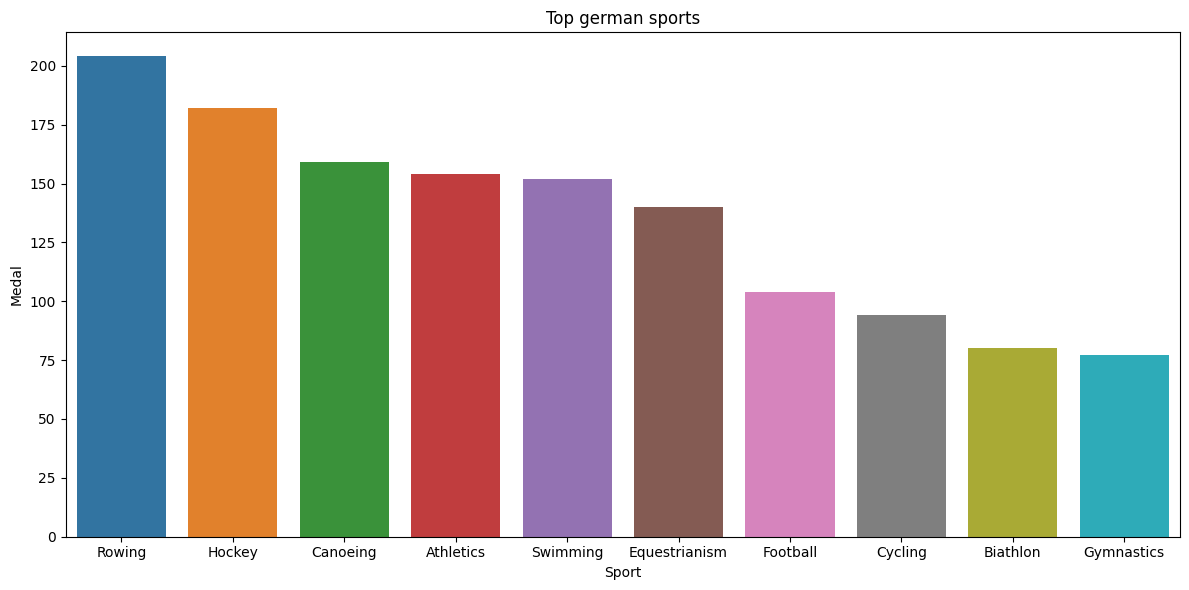

In [196]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x = 'Sport', y = 'Medal', palette='tab10')
plt.title('Top german sports')
plt.tight_layout()